In [5]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [9]:
import psycopg2
import pandas as pd
import psycopg2.extras

In [14]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "Sadia_2020",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [15]:
con = PostgresConnection().getConnection()

successfully connected to database


Q1

In [16]:
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN ecomdb_star_schema.time_dim tim on tim.time_key=t.time_key " \
                "WHERE tim.month=12 " \
                "GROUP BY CUBE (s.division) " \
                "ORDER BY s.division "
cur.execute(select_stmt)
records = cur.fetchall()
records

[('BARISAL', Decimal('1276202.00')),
 ('CHITTAGONG', Decimal('3330276.00')),
 ('DHAKA', Decimal('6881352.50')),
 ('KHULNA', Decimal('1904099.50')),
 ('RAJSHAHI', Decimal('2082402.50')),
 ('RANGPUR', Decimal('1442115.00')),
 ('SYLHET', Decimal('930513.50')),
 (None, Decimal('17846961.00'))]

In [19]:

df = pd.DataFrame(list(records), columns=['division', 'sales'])

In [20]:
df.dtypes

division    object
sales       object
dtype: object

In [21]:
df['sales'] = df['sales'].astype('float64')

In [22]:
import matplotlib.pyplot as plt

In [23]:
df

,division,sales
0,BARISAL,1276202.0
1,CHITTAGONG,3330276.0
2,DHAKA,6881352.5
3,KHULNA,1904099.5
4,RAJSHAHI,2082402.5
5,RANGPUR,1442115.0
6,SYLHET,930513.5


In [14]:
pip install matplotlib

  Using cached matplotlib-3.5.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
     |████████████████████████████████| 4.3 MB 601 kB/s            
     |████████████████████████████████| 895 kB 7.6 MB/s            
  Using cached kiwisolver-1.3.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
You should consider upgrading via the '/home/raihan/eSRD-Lab/HDA/hdaenv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
df = df.set_index(['division'])

<AxesSubplot:ylabel='sales'>

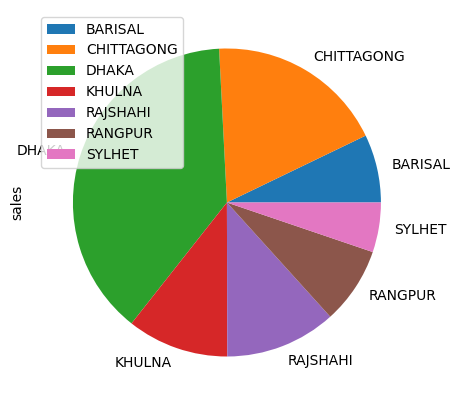

In [18]:
df.plot.pie(y='sales', x='division', figsize=(5, 5))

### PANDAS Techiques:
1. Filter
2. Drop
3. iloc, loc
4. Aggregate
5. Index
6. Column selection, copy, crop
7. Merge, Concate

In [30]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = "SELECT tim.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN ecomdb_star_schema.time_dim tim on tim.time_key=t.time_key " \
                "WHERE tim.month=12 " \
                "GROUP BY tim.year " \
                "ORDER BY tim.year"
curr.execute(select_stmts)
records = curr.fetchall()
records

successfully connected to database


[(2014, Decimal('2594400.00')),
 (2015, Decimal('2558759.00')),
 (2016, Decimal('2493810.00')),
 (2017, Decimal('2431545.50')),
 (2018, Decimal('2661466.00')),
 (2019, Decimal('2413211.00')),
 (2020, Decimal('2693769.50'))]

In [38]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = "SELECT tim.month, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN ecomdb_star_schema.time_dim tim on tim.time_key=t.time_key " \
                "GROUP BY tim.month " \
                "ORDER BY tim.month"
curr.execute(select_stmts)
records = curr.fetchall()
records

successfully connected to database


[(1, Decimal('18084488.00')),
 (2, Decimal('16147755.00')),
 (3, Decimal('17878304.00')),
 (4, Decimal('17009269.50')),
 (5, Decimal('18156005.00')),
 (6, Decimal('17113706.00')),
 (7, Decimal('18093160.00')),
 (8, Decimal('17858950.50')),
 (9, Decimal('17448653.00')),
 (10, Decimal('17805567.50')),
 (11, Decimal('17360052.00')),
 (12, Decimal('17846961.00'))]

In [41]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = "SELECT s.name, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.customer_dim s on s.customer_key=t.customer_key " \
                "JOIN ecomdb_star_schema.trans_dim tim on tim.payment_key=t.payment_key " \
                "GROUP BY s.name " \
                "ORDER BY s.name"
curr.execute(select_stmts)
records = curr.fetchall()
records

successfully connected to database


[('-', Decimal('41287.00')),
 ('aafreen fatima', Decimal('22349.50')),
 ('aafrin', Decimal('44273.50')),
 ('aafrin @ dolly', Decimal('47059.50')),
 ('aaftaab husan', Decimal('19364.00')),
 ('aakanksha', Decimal('22938.00')),
 ('aaliya', Decimal('43326.50')),
 ('aamina', Decimal('25298.50')),
 ('aamir', Decimal('20268.00')),
 ('aamir hussain', Decimal('21785.00')),
 ('aamod & pramod', Decimal('24560.50')),
 ('aamrin jahan', Decimal('23244.00')),
 ('aanamika misra', Decimal('17858.50')),
 ('aanchal', Decimal('71407.00')),
 ('aanik with her son', Decimal('17136.50')),
 ('aansi devi', Decimal('19818.00')),
 ('aanya @ china', Decimal('22887.00')),
 ('aaradhana @ priyanka', Decimal('22938.50')),
 ('aarifa bano', Decimal('22591.50')),
 ('aarifun bivi', Decimal('26278.50')),
 ('aarti', Decimal('1323350.50')),
 ('aarti @ kajal', Decimal('24217.00')),
 ('aarti @ noni', Decimal('24671.00')),
 ('aarti bunkar', Decimal('27323.50')),
 ('aarti devi', Decimal('53074.00')),
 ('aarti diwakar', Decimal('

In [43]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = "SELECT tim.bank_name, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.customer_dim s on s.customer_key=t.customer_key " \
                "JOIN ecomdb_star_schema.trans_dim tim on tim.payment_key=t.payment_key " \
                "GROUP BY tim.bank_name " \
                "ORDER BY tim.bank_name"
curr.execute(select_stmts)
records = curr.fetchall()
records

successfully connected to database


[('AB Bank Limited', Decimal('5457031.00')),
 ('Bangladesh Commerce Bank Limited', Decimal('5461998.50')),
 ('Bank Asia Limited', Decimal('5374285.50')),
 ('Bengal Commercial Bank Ltd', Decimal('5409108.50')),
 ('Bkash', Decimal('5378705.00')),
 ('BRAC Bank Limited', Decimal('5411591.50')),
 ('Citizens Bank Limited', Decimal('5446430.50')),
 ('City Bank Limited', Decimal('5427905.00')),
 ('Community Bank Bangladesh Limited', Decimal('5371503.00')),
 ('Dhaka Bank Limited', Decimal('5456732.00')),
 ('Dutch-Bangla Bank Limited', Decimal('5384870.50')),
 ('Eastern Bank Limited', Decimal('5374364.50')),
 ('IFIC Bank Limited', Decimal('5399519.50')),
 ('Jamuna Bank Limited', Decimal('5379773.00')),
 ('Meghna Bank Limited', Decimal('5401057.00')),
 ('Mercantile Bank Limited', Decimal('5353157.00')),
 ('Midland Bank Limited', Decimal('5376860.50')),
 ('Modhumoti Bank Limited', Decimal('5430558.00')),
 ('Mutual Trust Bank Limited', Decimal('5340061.00')),
 ('Nagad', Decimal('5399109.00')),
 ('N

In [44]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = "SELECT tim.trans_type, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.customer_dim s on s.customer_key=t.customer_key " \
                "JOIN ecomdb_star_schema.trans_dim tim on tim.payment_key=t.payment_key " \
                "GROUP BY tim.trans_type " \
                "ORDER BY tim.trans_type"
curr.execute(select_stmts)
records = curr.fetchall()
records

successfully connected to database


[('card', Decimal('189166077.00')),
 ('cash', Decimal('5417031.50')),
 ('mobile', Decimal('16219763.00'))]

In [60]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.division, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN ecomdb_star_schema.time_dim tim on tim.time_key=t.time_key " \
                "WHERE s.division='BARISAL' "\
                "GROUP BY s.division " \
                "ORDER BY s.division"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BARISAL', Decimal('15040687.50'))]

In [64]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = "SELECT tim.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN ecomdb_star_schema.time_dim tim on tim.time_key=t.time_key " \
                "WHERE tim.year='2015' " \
                "GROUP BY tim.year " \
                "ORDER BY tim.year"
curr.execute(select_stmts)
records = curr.fetchall()
records

successfully connected to database


[(2015, Decimal('30191440.50'))]

In [12]:
con = PostgresConnection().getConnection()
curr = con.cursor()
select_stmts = "SELECT tim.year, SUM(t.total_price) " \
              "FROM ecomdb_star_schema.fact_table t " \
              "JOIN ecomdb_star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN ecomdb_star_schema.time_dim tim on tim.time_key=t.time_key " \
                "WHERE tim.year='2015' AND WHERE s.division='BARISAL' " 
                
curr.execute(select_stmts)
records = curr.fetchall()
records

successfully connected to database


SyntaxError: syntax error at or near "WHERE"
LINE 1: ...tim.time_key=t.time_key WHERE tim.year='2015' AND WHERE s.di...
                                                             ^
